In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
%matplotlib inline

In [3]:
xx=pd.read_csv('titanic_train.csv')

In [22]:
xx.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


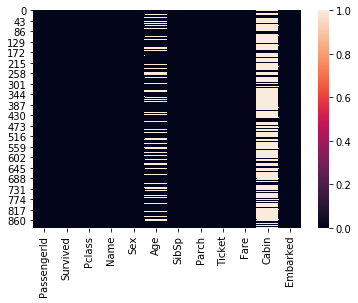

In [5]:
sns.heatmap(xx.isnull())

In [6]:
xx['Age'].fillna(value=xx['Age'].mean(),inplace=True)

In [9]:
xx.drop('Cabin',axis=1,inplace=True)

In [10]:
xx.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [21]:
xx['Male']=pd.get_dummies(xx['Sex'],drop_first=True)

In [28]:
xx['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
xx.dropna(inplace=True)

In [32]:
xx['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
xx['S']=pd.get_dummies(xx['Embarked'],drop_first=True)['S']

In [18]:
xx['Q']=pd.get_dummies(xx['Embarked'],drop_first=True)['Q']

In [26]:
xx.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,Male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0


In [23]:
xx.drop(['Sex','Embarked'],axis=1,inplace=True)

In [24]:
xx.sample(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,Male
817,0,2,31.000000,1,1,37.0042,0,0,1
883,0,2,28.000000,0,0,10.5000,0,1,1
667,0,3,29.699118,0,0,7.7750,0,1,1
743,0,3,24.000000,1,0,16.1000,0,1,1


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x=xx.drop('Survived',axis=1)

In [30]:
y=xx['Survived']

In [31]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
ll=LogisticRegression()

In [35]:
ll.fit(x_tr,y_tr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predi=ll.predict(x_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(predi,y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       183
           1       0.65      0.81      0.72        84

    accuracy                           0.81       267
   macro avg       0.78      0.81      0.79       267
weighted avg       0.82      0.81      0.81       267



In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
print(confusion_matrix(predi,y_test))

[[147  36]
 [ 16  68]]


In [44]:
x_tr.shape

(622, 8)

In [46]:
x_test.shape

(267, 8)

# Project

In [3]:
ww=pd.read_csv('advertising.csv')

In [4]:
ww.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


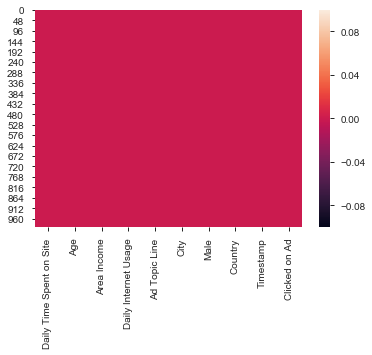

In [5]:
sns.heatmap(ww.isnull())

In [12]:
ww.drop('Country',axis=1,inplace=True)

In [13]:
ww.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0


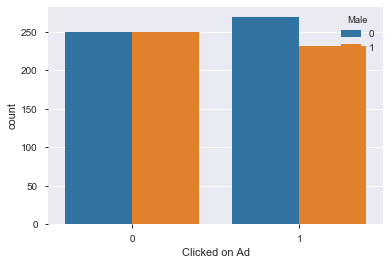

In [14]:
sns.countplot(ww['Clicked on Ad'],hue=ww['Male'])

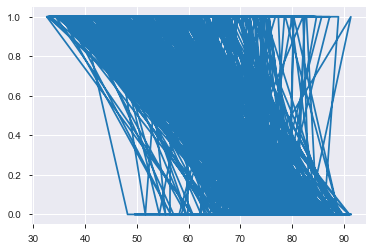

In [15]:
plt.plot(ww['Daily Time Spent on Site'],ww['Clicked on Ad'])

In [16]:
ww.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0


In [46]:
ww.sample(4)

,Daily Time Spent on Site,Age,Daily Internet Usage,Male,Clicked on Ad
865,39.53,33,142.21,1,1
156,44.64,36,127.01,0,1
582,40.04,27,161.58,0,1
511,70.29,26,231.37,1,0


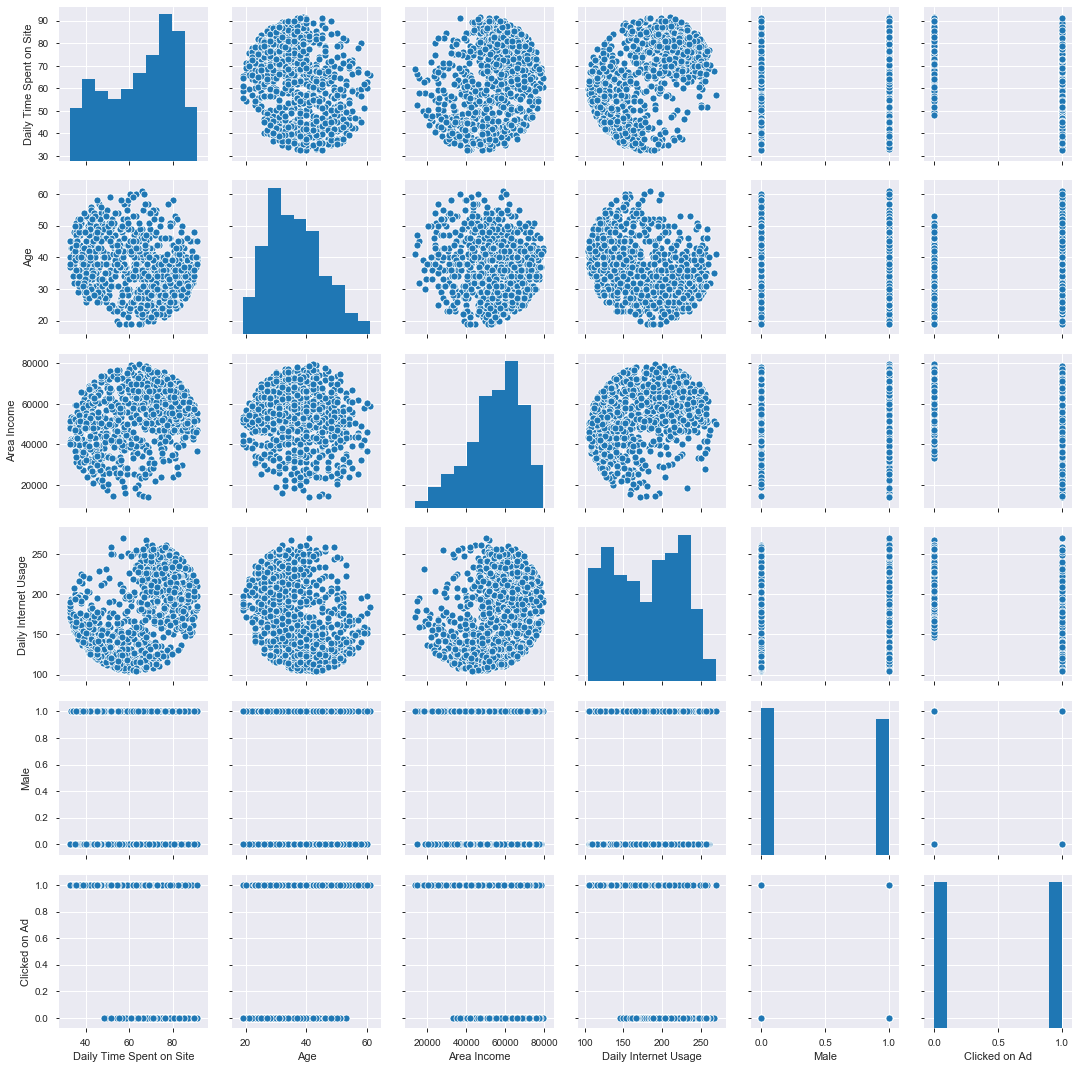

In [21]:
sns.pairplot(ww)

In [48]:
ww.sample(4)

,Daily Time Spent on Site,Age,Daily Internet Usage,Male,Clicked on Ad
246,39.96,45,146.13,1,1
662,48.26,50,122.45,1,1
864,74.06,50,246.29,1,0
668,52.56,31,250.36,1,1


In [23]:
ww.drop('Area Income',axis=1,inplace=True)

In [25]:
a=ww.drop('Clicked on Ad',axis=1)

In [26]:
b=ww['Clicked on Ad']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.4, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log=LogisticRegression()

In [31]:
log.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
kk=log.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(kk,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       207
           1       0.95      0.95      0.95       193

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
acc=confusion_matrix(kk,y_test)

In [37]:
print((acc[0,0]+acc[1][1]))

381


In [38]:
381/(197+19+184)

0.9525

In [39]:
acc

array([[197,  10],
       [  9, 184]], dtype=int64)

In [102]:
ww.profile_report()

In [49]:
print(log.predict([[48.26,50,122.45,1]]))

[1]
